In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import fashion_mnist
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# encoded representation size
encoding_dimmensions = 32

In [0]:
# input image placeholder
input_image = Input(shape=(784,))
# Encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_image)
# Loss reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# Maps an input to its reconstruction
autoencoder = Model(input_image, decoded)

In [0]:
# Maps an input to its encoded representation
encoder = Model(input_image, encoded)
# create a image placeholder for an encoded input
encoded_input = Input(shape=(encoding_dimmensions,))
# retrieve the last layer of the autoencoder
decoder_layer = autoencoder.layers[-1]
# The decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [0]:
# Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [68]:
tensorboard = TensorBoard(log_dir='2', histogram_freq=0, write_graph=True, write_images=False)
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy), callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1391 - accuracy: 0.8088 - val_loss: 0.0892 - val_accuracy: 0.0000e+00
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1382 - accuracy: 0.8090 - val_loss: 0.0873 - val_accuracy: 0.0000e+00
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1374 - accuracy: 0.8091 - val_loss: 0.0855 - val_accuracy: 0.0000e+00
Epoch 4/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1366 - accuracy: 0.8092 - val_loss: 0.0839 - val_accuracy: 0.0000e+00
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1359 - accuracy: 0.8094 - val_loss: 0.0823 - val_accuracy: 0.0000e+00
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1353 - accuracy: 0.8095 - val_loss: 0.0808 - val_accuracy: 0.0000e+00
Epoch 7/20
60000/60000 [====================

In [0]:
# encode and decode
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

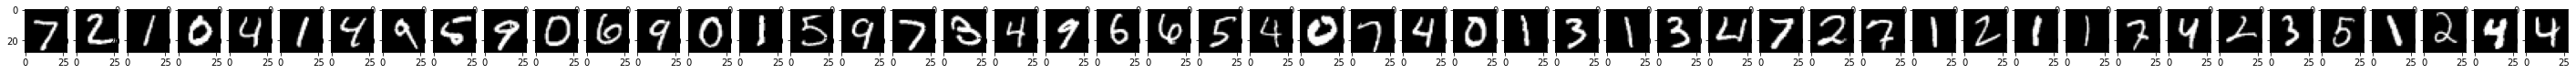

In [70]:
n = 50  # Number of digits that displays
plt.figure(figsize=(50, 4))
for i in range(n):
    #original data display
    ax = plt.subplot(3, n, i + 1 )
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

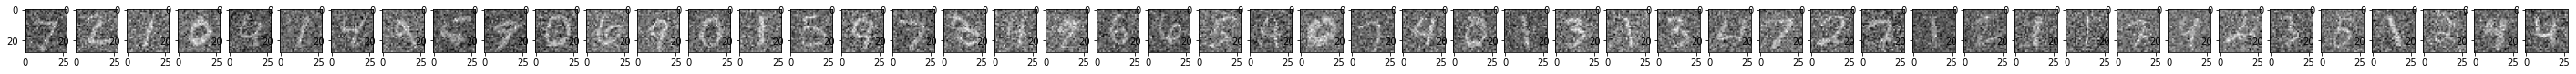

In [71]:
n = 50 # Number of digits that displays
plt.figure(figsize=(50, 4))
for i in range(n):
  # Noisy data
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(True)
  ax.get_yaxis().set_visible(True)

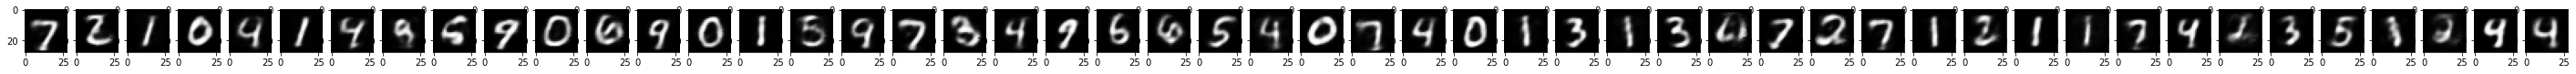

In [72]:
n = 50 # Number of digits that displays
plt.figure(figsize=(50, 4))
for i in range(n):
    # Reconstruction data
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

Text(0.5, 1.0, 'Loss Curve for training and validation : ')

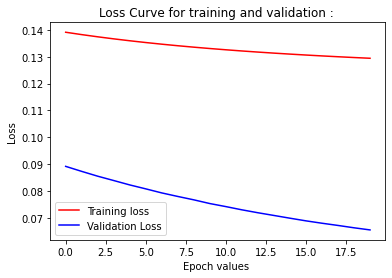

In [75]:
figure1 = plt.figure() # plotting the loss curve
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epoch values ')
plt.ylabel('Loss')
plt.title('Loss Curve for training and validation : ')

Text(0.5, 1.0, 'Accuracy Curve for training and validation : ')

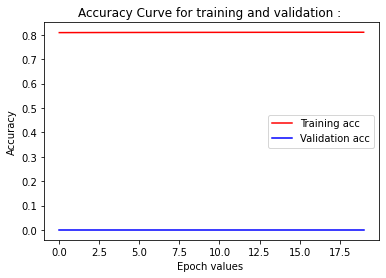

In [77]:
figure2 = plt.figure() #plotting the accuracy curve
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Training acc', 'Validation acc'])
plt.xlabel('Epoch values ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for training and validation : ')